## 0. Accessing the Dataset and other data

If necessary to use previous saved models.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/EMBRAPA_EUSCHISTUS.zip -d ../content/

In [ ]:
!unzip -q /content/drive/MyDrive/detect_last.zip -d ../content/

In [ ]:
!unzip -q /content/drive/MyDrive/INSECT10K7C640_SAT.v1i.yolov8.zip -d ../content/

# 1. YOLOv8 Setup

In [ ]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
%pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


## 1.1 Comet Configurations

In [ ]:
%pip install comet_ml --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.9/514.9 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 kB 50.3 MB/s eta 0:00:00


In [ ]:
import comet_ml
comet_ml.init(project_name="euchistos-heros")

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /content/drive/MyDrive/.comet.config (set COMET_CONFIG to change where it is saved).


## 1.2 Tensorboard Configurations

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

### 1.2.1 Tensorboard Uploading

In [ ]:
!tensorboard dev upload --logdir /content/ultralytics/runs/detect \
  --name "YOLOv8n C2f2 P2" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/IPmk2SbWRK2Lxv5ai75wfg/

[2023-05-13T01:50:05] Started scanning logdir.
[2023-05-13T01:50:12] Total uploaded: 18716 scalars, 0 tensors, 0 binary objects
[2023-05-13T01:50:12] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/IPmk2SbWRK2Lxv5ai75wfg/


# 2. Train - YOLOv8

In [ ]:
# Train YOLOv8n
!yolo train model=yolov8n.pt data=/content/ultralytics/ultralytics/data/custom_data.yaml epochs=100 imgsz=640 batch=-1 patience=100

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/ultralytics/ultralytics/data/custom_data.yaml, epochs=100, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [ ]:
# Train YOLOv8n @ c2f2 / P2
!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8-p2.yaml data=/content/ultralytics/ultralytics/data/custom_data.yaml epochs=100 imgsz=640 batch=150 patience=100

WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      1492  ultralytics.nn.modules.block.C2f2            [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2      7184  ultralytics.nn.modules.block.C2f2            [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2     28192  ultralytics.nn.modules.block.C2f2            [128, 128, 2, True]           
  7                  -1  1    295

In [ ]:
# Train YOLOv8n @ c2f2 / P2

!yolo train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8-p2.yaml data=/content/ultralytics/ultralytics/data/custom_data.yaml epochs=100 imgsz=640 batch=-1 patience=100

WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      1556  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2      7696  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2     30240  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295

## 2.2 Downloading the Folders

In [ ]:
!zip -r /content/ultralytics/runs/detect.zip /content/ultralytics/runs/detect/train/

  adding: content/ultralytics/runs/detect/train/ (stored 0%)
  adding: content/ultralytics/runs/detect/train/labels.jpg (deflated 22%)
  adding: content/ultralytics/runs/detect/train/R_curve.png (deflated 18%)
  adding: content/ultralytics/runs/detect/train/val_batch1_pred.jpg (deflated 4%)
  adding: content/ultralytics/runs/detect/train/F1_curve.png (deflated 18%)
  adding: content/ultralytics/runs/detect/train/P_curve.png (deflated 15%)
  adding: content/ultralytics/runs/detect/train/PR_curve.png (deflated 18%)
  adding: content/ultralytics/runs/detect/train/val_batch0_labels.jpg (deflated 4%)
  adding: content/ultralytics/runs/detect/train/weights/ (stored 0%)
  adding: content/ultralytics/runs/detect/train/weights/best.pt (deflated 15%)
  adding: content/ultralytics/runs/detect/train/weights/last.pt (deflated 15%)
  adding: content/ultralytics/runs/detect/train/results.csv (deflated 86%)
  adding: content/ultralytics/runs/detect/train/train_batch1891.jpg (deflated 3%)
  adding: con

In [ ]:
from google.colab import files
files.download("/content/ultralytics/runs/detect.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Detection/Inference - YOLOv8


In [ ]:
!yolo task=detect mode=predict model=/content/best.pt conf=0.3 source=/content/test/images

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8-p2 summary (fused): 207 layers, 1694264 parameters, 0 gradients, 8.6 GFLOPs

image 1/42 /content/test/images/20210226_091352_jpg.rf.5e4db1013e89aa18df9ecb4cfed73563.jpg: 640x640 (no detections), 33.9ms
image 2/42 /content/test/images/20210226_091402_jpg.rf.bb61db6a996e49e0f23718b5c4b11e8e.jpg: 640x640 1 bug, 13.6ms
image 3/42 /content/test/images/20210226_091948_jpg.rf.1d7a2692e5a2ffd9caab238517d560e2.jpg: 640x640 (no detections), 8.7ms
image 4/42 /content/test/images/20210226_092447_jpg.rf.e51c11ef51ec73cec3cbc0fc7af0861a.jpg: 640x640 (no detections), 8.5ms
image 5/42 /content/test/images/20210226_092912_jpg.rf.8b8d14747e9317fd35f6e92378d08aa6.jpg: 640x640 2 bugs, 7.2ms
image 6/42 /content/test/images/20210226_092917_jpg.rf.597a59d543f9c9116ccd4d054ba66ca2.jpg: 640x640 (no detections), 7.5ms
image 7/42 /content/test/images/20210226_092923_jpg.rf.368473ac7d8f68f2c684e7e7df1a6100.j

## 3.1 Zip and Download (Images or Video)

In [ ]:
!zip -r /content/ultralytics/runs/detect/predict.zip /content/ultralytics/runs/detect/predict

  adding: content/ultralytics/runs/detect/predict/ (stored 0%)
  adding: content/ultralytics/runs/detect/predict/20210302_084056_jpg.rf.2018aedcc3dd052b83adb4579e9d5e9f.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/20210302_084059_jpg.rf.b710fff3a835fc28b491ad3eeb7fc3cd.jpg (deflated 4%)
  adding: content/ultralytics/runs/detect/predict/20210226_094319_jpg.rf.6e3cdcc397fe1bb729c18bbf9e579532.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/20210226_094147_jpg.rf.9afc96b0cb2d69f937a5a465682fe1a3.jpg (deflated 4%)
  adding: content/ultralytics/runs/detect/predict/20210302_084035_jpg.rf.82ad1cc32897d5963975f91870754358.jpg (deflated 4%)
  adding: content/ultralytics/runs/detect/predict/20210226_093558_jpg.rf.9abd3f9925bad908a5dadf48dea21c75.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/20210226_095339_jpg.rf.b1b4ea6739144456280fe4188d4fec37.jpg (deflated 5%)
  adding: content/ultralytics/runs/detect/predict/20210302_083614_jpg

In [ ]:
from google.colab import files

files.download("/content/ultralytics/runs/detect/predict.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Export

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [ ]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=torchscript

# 5. ByteTrack

## 5.1 Initial Adjustments

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/ultralytics


In [ ]:
%cd {HOME}

/content/ultralytics


In [ ]:
SOURCE_VIDEO_PATH = "/content/embrapa_euschistus.mp4"

## 5.2 Install Roboflow Supervision

In [ ]:
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.16.0


## 5.3 Load pre-trained YOLOv8 model

In [ ]:
MODEL = '/content/best.pt'

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

YOLOv8-p2 summary (fused): 207 layers, 1694264 parameters, 0 gradients, 8.6 GFLOPs


## 5.4 Predict and annotate single frame

In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names

# class_ids of interest - car, motorcycle, bus and truck
selected_classes = [0]

In [ ]:
import supervision as sv
import numpy as np

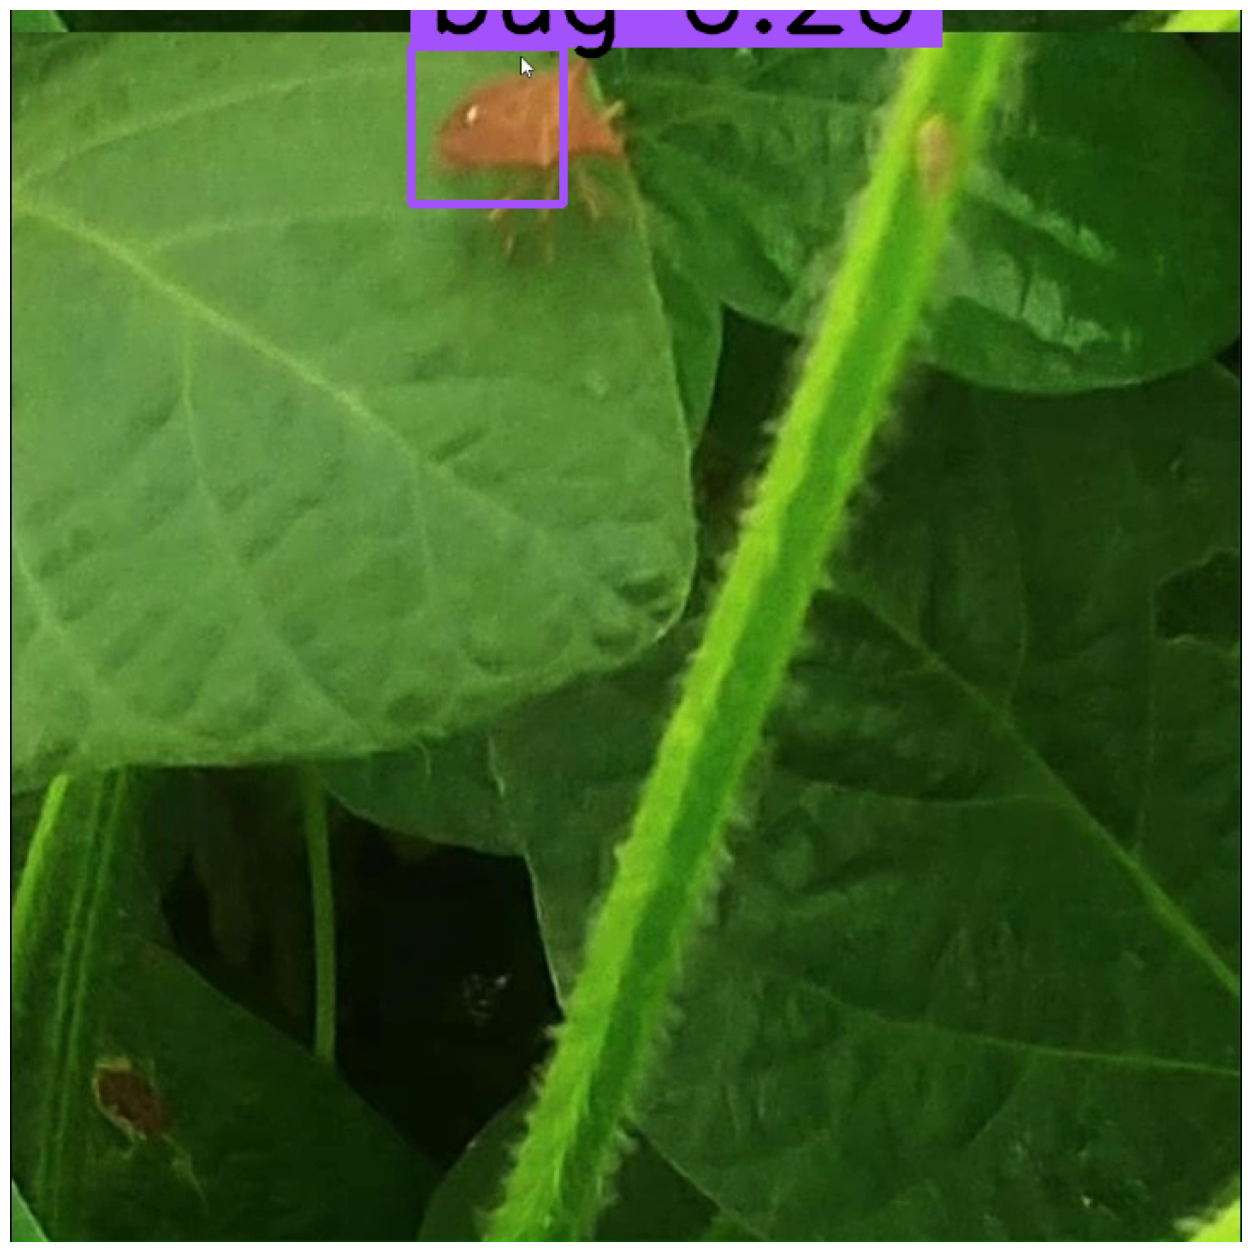

In [ ]:
# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame, verbose=False)[0]

# convert to Detections
detections = sv.Detections.from_ultralytics(results)
# only consider class id from selected_classes define above
detections = detections[np.isin(detections.class_id, selected_classes)]

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _ in detections
]

# annotate and display frame
anotated_frame=box_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(anotated_frame, (16,16))

## 5.5 Predict and annotate whole video

In [ ]:
# settings
LINE_START = sv.Point(50, 1500)
LINE_END = sv.Point(3840-50, 1500)

TARGET_VIDEO_PATH = f"{HOME}/processed_embrapa_euschistus.mp4"

In [ ]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=720, height=720, fps=30, total_frames=3815)

In [ ]:
# create BYTETracker instance
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=30)

# create VideoInfo instance
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# create LineZone instance, it is previously called LineCounter class
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

# create instance of BoxAnnotator
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

# create instance of TraceAnnotator
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)

# create LineZoneAnnotator instance, it is previously called LineCounterAnnotator class
line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)

# define call back function to be used in video processing
def callback(frame: np.ndarray, index:int) -> np.ndarray:
    # model prediction on single frame and conversion to supervision Detections
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    # only consider class id from selected_classes define above
    detections = detections[np.isin(detections.class_id, selected_classes)]
    # tracking detections
    detections = byte_tracker.update_with_detections(detections)
    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for _, _, confidence, class_id, tracker_id
        in detections
    ]
    annotated_frame = trace_annotator.annotate(
        scene=frame.copy(),
        detections=detections
    )
    annotated_frame=box_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels)

    # update line counter
    line_zone.trigger(detections)
    # return frame with box and line annotated result
    return  line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

# process the whole video
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)

In [ ]:
!zip -r /content/ultralytics/processed_embrapa_euschistus.mp4.zip /content/ultralytics/processed_embrapa_euschistus.mp4

  adding: content/ultralytics/processed_embrapa_euschistus.mp4 (deflated 2%)


In [ ]:
from google.colab import files

files.download("/content/ultralytics/processed_embrapa_euschistus.mp4.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Appendix

Additional content below.

In [ ]:
# Run YOLOv8 tests (git clone install only)
!pytest ultralytics/tests

In [ ]:
# Validate multiple models
for x in 'nsmlx':
  !yolo val model=yolov8{x}.pt data=coco.yaml